# Descriptive Statistics

In [12]:
#! pip install scipy

In [13]:
# import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

# when using notebooks
%matplotlib inline

df = pd.read_csv('penguins.csv')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female


In [14]:
df.shape

(344, 7)

In [15]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [16]:
df = df.fillna(method='ffill')

---

#### Type of variables

species: Categorical

island: Categorical

bill_length_mm: Metric

bill_length_mm: Metric

flipper_length_mm: Metric

body_mass_g: Metric

sex: Categorical

---

In [8]:
# Exercise: Find functions in pandas, scipy or numpy that allow you to calculate
# the discussed measures

# Measures of central tendency

## arithmetic mean
mean = df.mean()
mean

bill_length_mm         43.920930
bill_depth_mm          17.143605
flipper_length_mm     200.936047
body_mass_g          4201.090116
dtype: float64

In [9]:
## median
median = df.median()
median

bill_length_mm         44.45
bill_depth_mm          17.30
flipper_length_mm     197.00
body_mass_g          4050.00
dtype: float64

In [10]:
df.max(numeric_only=True)

bill_length_mm         59.6
bill_depth_mm          21.5
flipper_length_mm     231.0
body_mass_g          6300.0
dtype: float64

In [11]:
## mode
df.mode(numeric_only=True)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,41.1,17.0,190.0,3800.0


In [29]:
## Variance
df['bill_depth_mm'].var()

3.9138365312902548

In [30]:
## Standard Deviation
df['bill_depth_mm'].std()

1.9783418641100063

In [31]:
np.sqrt(df['bill_depth_mm'].var())

1.9783418641100063

In [17]:
## Range
df['bill_depth_mm'].max() - df['bill_depth_mm'].min()

8.4

In [18]:
## IQR
df['bill_depth_mm'].quantile(0.75) - df['bill_depth_mm'].quantile(0.25)

3.125

In [19]:
stats.iqr(df['bill_depth_mm'], rng=(25, 75))

3.125

<AxesSubplot:>

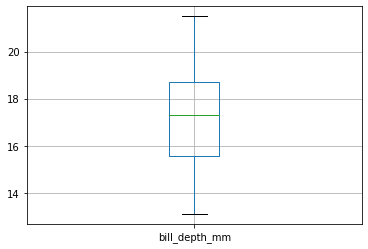

In [20]:
## Boxplot
df.boxplot('bill_depth_mm')

### Distributions 

#### Univariate distributions

Frequency table: `.value_counts()`

Histogram: `.hist()`


#### Multivariate distributions

Categorical and Ordinal Variables: `crosstab()`

Metric Variables: `corr()`

In [21]:
df.sex.value_counts(normalize=True)

male      0.514535
female    0.485465
Name: sex, dtype: float64

#### Look at histograms

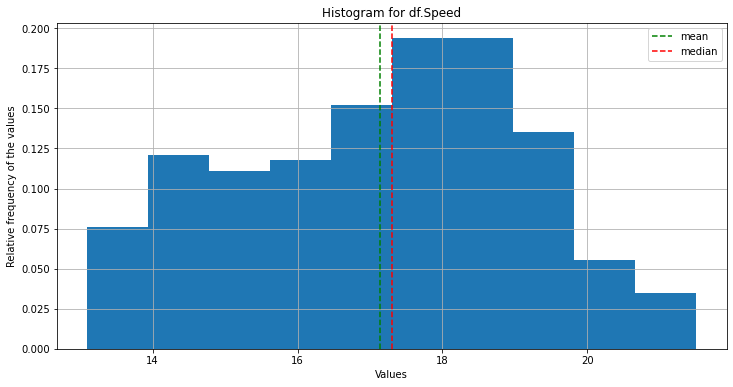

In [22]:
df.bill_depth_mm.hist(figsize=(12,6), density=True, bins=10)
plt.title('Histogram for df.Speed')
plt.xlabel('Values')
plt.ylabel('Relative frequency of the values')
plt.axvline(df.bill_depth_mm.mean(), c='g', linestyle='--', label='mean')
plt.axvline(df.bill_depth_mm.median(), c='r', linestyle='--', label='median')
plt.legend()
plt.show()

In [23]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male


In [24]:
# Crosstab
pd.crosstab(df.body_mass_g, df.flipper_length_mm, normalize='all', margins=True)

flipper_length_mm,172.0,174.0,176.0,178.0,179.0,180.0,181.0,182.0,183.0,184.0,...,222.0,223.0,224.0,225.0,226.0,228.0,229.0,230.0,231.0,All
body_mass_g,,,,,,,,,,,,,,,,,,,,,
2700.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002907
2850.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002907,0.000000,0.000000,0.002907,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005814
2900.0,0.000000,0.000000,0.000000,0.002907,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011628
2925.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002907
2975.0,0.000000,0.000000,0.000000,0.000000,0.002907,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5950.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.002907,0.000000,0.000000,0.000000,0.000000,0.002907,0.000000,0.000000,0.005814
6000.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.002907,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005814
6050.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002907,0.000000,0.002907


### Correlations

In [25]:
correlations = df.corr()
correlations

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.237563,0.656864,0.596365
bill_depth_mm,-0.237563,1.000000,-0.585477,-0.474244
flipper_length_mm,0.656864,-0.585477,1.000000,0.870961
body_mass_g,0.596365,-0.474244,0.870961,1.000000


In [26]:
import seaborn as sns

<AxesSubplot:>

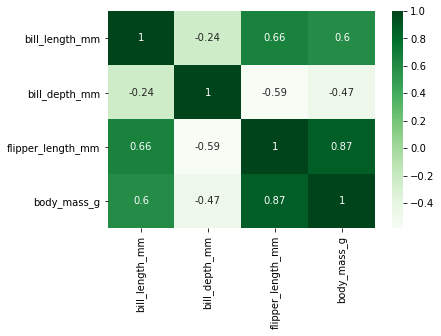

In [30]:
sns.heatmap(correlations, annot=True, cmap='Greens')